# Task - 2 <br>Association rules on my_movies.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv('data/my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Pre-Processing

In [3]:
df = pd.get_dummies(df)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [4]:
df.shape

(10, 25)

In [5]:
df.isnull().sum()

Sixth Sense         0
Gladiator           0
LOTR1               0
Harry Potter1       0
Patriot             0
LOTR2               0
Harry Potter2       0
LOTR                0
Braveheart          0
Green Mile          0
V1_Gladiator        0
V1_Harry Potter1    0
V1_LOTR1            0
V1_Sixth Sense      0
V2_Harry Potter2    0
V2_LOTR             0
V2_LOTR1            0
V2_LOTR2            0
V2_Patriot          0
V3_Braveheart       0
V3_Gladiator        0
V3_Harry Potter1    0
V3_Sixth Sense      0
V4_Green Mile       0
V5_LOTR2            0
dtype: int64

# i) Apriori algorithm with min_support = 0.4 and min_threshold = 0.95

In [6]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen..."
59,0.4,"(V1_Gladiator, V3_Sixth Sense, Gladiator, Sixt..."
60,0.4,"(V1_Gladiator, Patriot, V3_Sixth Sense, Sixth ..."
61,0.4,"(V1_Gladiator, Patriot, V3_Sixth Sense, Gladia..."


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.95)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,(V2_Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Sixth Sense),(V2_Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
9,(Sixth Sense),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [8]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
406,"(V1_Gladiator, V3_Sixth Sense)","(Patriot, Gladiator, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
267,"(Patriot, V3_Sixth Sense)","(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
253,"(V1_Gladiator, V3_Sixth Sense)","(Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
254,"(V1_Gladiator, Sixth Sense)","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
255,"(Patriot, V3_Sixth Sense)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
41,(Sixth Sense),"(V1_Gladiator, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
35,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
205,(Sixth Sense),"(V1_Gladiator, V2_Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
30,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [9]:
rules[rules.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,"(Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
70,(V3_Sixth Sense),"(Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
79,"(V1_Gladiator, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
82,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
85,"(V2_Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
...,...,...,...,...,...,...,...,...,...
588,"(Patriot, Sixth Sense)","(V1_Gladiator, V3_Sixth Sense, Gladiator, V2_P...",0.4,0.4,0.4,1.0,2.5,0.24,inf
590,"(V3_Sixth Sense, Gladiator)","(V1_Gladiator, Patriot, V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
592,"(V3_Sixth Sense, V2_Patriot)","(V1_Gladiator, Patriot, Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
595,"(V2_Patriot, Sixth Sense)","(V1_Gladiator, Patriot, V3_Sixth Sense, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf


Text(0.5, 1.0, 'Support vs Confidence')

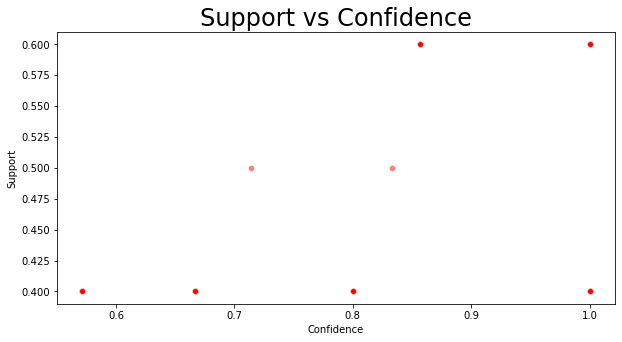

In [10]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = rules['confidence'] , y = rules['support'] , alpha = 0.5 , color = 'r')
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.title('Support vs Confidence' , fontsize = 24)

# ii) Apriori algorithm with min_support = 0.4 and min_threshold = 0.80

In [11]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen..."
59,0.4,"(V1_Gladiator, V3_Sixth Sense, Gladiator, Sixt..."
60,0.4,"(V1_Gladiator, Patriot, V3_Sixth Sense, Sixth ..."
61,0.4,"(V1_Gladiator, Patriot, V3_Sixth Sense, Gladia..."


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.80)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,(V2_Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Sixth Sense),(V2_Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
9,(Sixth Sense),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [13]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
406,"(V1_Gladiator, V3_Sixth Sense)","(Patriot, Gladiator, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
267,"(Patriot, V3_Sixth Sense)","(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
253,"(V1_Gladiator, V3_Sixth Sense)","(Patriot, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
254,"(V1_Gladiator, Sixth Sense)","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
255,"(Patriot, V3_Sixth Sense)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
41,(Sixth Sense),"(V1_Gladiator, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
35,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
205,(Sixth Sense),"(V1_Gladiator, V2_Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
30,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [14]:
rules[rules.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,"(Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
70,(V3_Sixth Sense),"(Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
79,"(V1_Gladiator, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
82,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
85,"(V2_Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
...,...,...,...,...,...,...,...,...,...
588,"(Patriot, Sixth Sense)","(V1_Gladiator, V3_Sixth Sense, Gladiator, V2_P...",0.4,0.4,0.4,1.0,2.5,0.24,inf
590,"(V3_Sixth Sense, Gladiator)","(V1_Gladiator, Patriot, V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
592,"(V3_Sixth Sense, V2_Patriot)","(V1_Gladiator, Patriot, Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
595,"(V2_Patriot, Sixth Sense)","(V1_Gladiator, Patriot, V3_Sixth Sense, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf


Text(0.5, 1.0, 'Support vs Confidence')

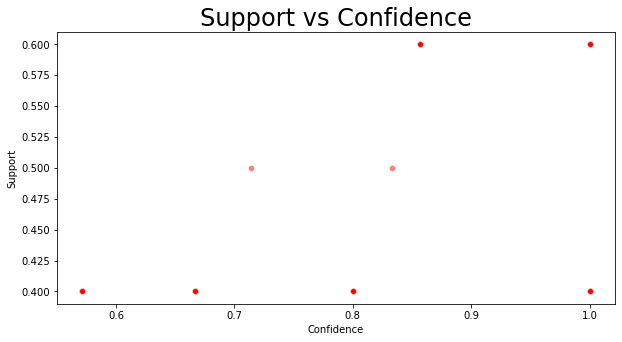

In [15]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = rules['confidence'] , y = rules['support'] , alpha = 0.5 , color = 'r')
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.title('Support vs Confidence' , fontsize = 24)

# iii) Apriori algorithm with min_support = 0.3 and min_threshold = 0.95

In [16]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(V1_Gladiator, Patriot)"


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.95)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [18]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
43,"(V1_Gladiator, V2_Patriot)","(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
23,(Patriot),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
24,(V2_Patriot),"(Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
45,"(Patriot, V2_Patriot)","(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
27,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
28,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
29,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
30,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [19]:
rules[rules.lift>1.60]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
10,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
11,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
12,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
13,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
15,"(V1_Gladiator, Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
16,"(Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
17,(V1_Gladiator),"(Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
18,(Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


Text(0.5, 1.0, 'Support vs Confidence')

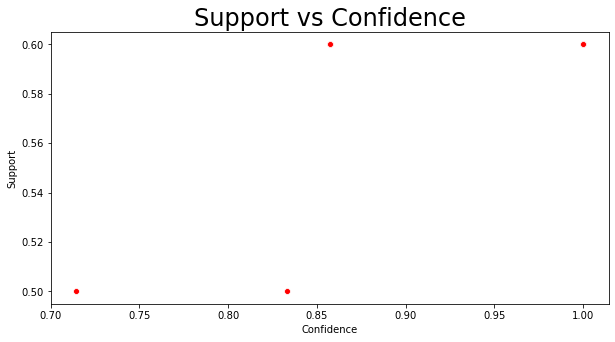

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = rules['confidence'] , y = rules['support'] , alpha = 1 , color = 'r')
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.title('Support vs Confidence' , fontsize = 24)

In [26]:
rules['lift'].argmax() , rules['lift'].max()

(8, 1.6666666666666667)

In [27]:
rules['support'].argmin() , rules['support'].min()

(0, 0.5)

In [28]:
rules.iloc[8, :2]

antecedents    (V1_Gladiator)
consequents         (Patriot)
Name: 8, dtype: object